In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8,4.5


In [2]:
os.chdir ('C:\\Noble\\Training\\KODO\\2025\\Dec 2025\\Dec 2025 Day 7\\')

In [3]:
pwd

'C:\\Noble\\Training\\KODO\\2025\\Dec 2025\\Dec 2025 Day 7'

In [4]:
df1 = pd.read_csv('Social_Network_Ads.csv')
print (df1)


      User ID  Gender  Age  EstimatedSalary  Purchased
0    11021175    Male   42           121315          0
1    17782313    Male   53            67214          0
2    14603818  Female   59           111005          0
3    18188198  Female   39            53414          0
4    19357305    Male   39           114285          0
..        ...     ...  ...              ...        ...
395  10220446  Female   20           141231          1
396  12387292    Male   50            75848          1
397  10715173  Female   25            82560          1
398  10016842    Male   55           147667          0
399  11699655  Female   54           134972          1

[400 rows x 5 columns]


In [5]:
print (df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [6]:
print (df1.describe ())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.510090e+07   39.885000     99748.227500    0.357500
std    2.862593e+06   11.796596     28374.358336    0.479864
min    1.001684e+07   20.000000     50075.000000    0.000000
25%    1.260593e+07   30.000000     76060.250000    0.000000
50%    1.509874e+07   40.000000     99205.000000    0.000000
75%    1.741296e+07   51.000000    122748.000000    1.000000
max    1.999616e+07   60.000000    149553.000000    1.000000


In [7]:
x= df1.iloc [:,2:4].values
print (x) 


[[    42 121315]
 [    53  67214]
 [    59 111005]
 [    39  53414]
 [    39 114285]
 [    39 107458]
 [    20  85582]
 [    59 148335]
 [    48  80579]
 [    42 114204]
 [    32  87786]
 [    49 113544]
 [    55  88300]
 [    54 147066]
 [    57 139622]
 [    41 134716]
 [    51 116333]
 [    55  72567]
 [    44 123254]
 [    47 113548]
 [    52  79343]
 [    20 106149]
 [    40  59674]
 [    52  76333]
 [    28 118742]
 [    22 105897]
 [    25 114815]
 [    38  85428]
 [    57 114005]
 [    57 133402]
 [    43 106726]
 [    35  84550]
 [    34  96296]
 [    32  68964]
 [    55  90946]
 [    48  51787]
 [    22  53940]
 [    42 138928]
 [    59 116474]
 [    23  97284]
 [    40 132951]
 [    24 119308]
 [    50 120675]
 [    41 113547]
 [    52 102686]
 [    34 140262]
 [    20  54075]
 [    25  63715]
 [    46  56058]
 [    58  65052]
 [    38  72107]
 [    21 108656]
 [    42 120639]
 [    31  68033]
 [    26  80283]
 [    47  60952]
 [    31 123137]
 [    36  98529]
 [    25 12130

In [8]:
y = df1.iloc[:,4].values
print (y)


[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


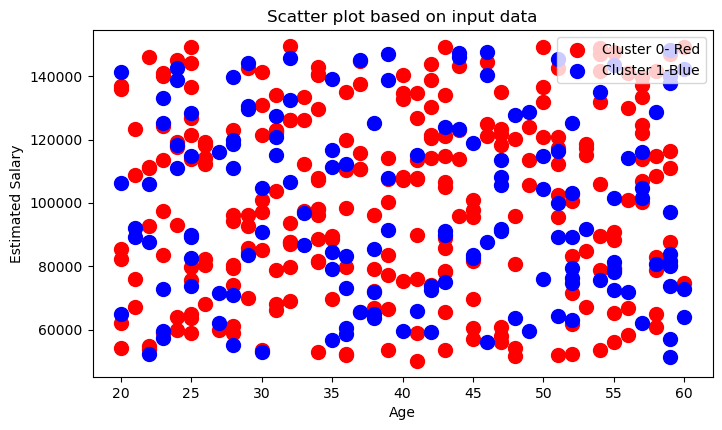

In [9]:


plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 0- Red')
plt.scatter (x[y == 1,0],x[y == 1,1] ,s = 100, c='b', label = 'Cluster 1-Blue')
plt.title ('Scatter plot based on input data')
plt.xlabel ('Age')
plt.ylabel ('Estimated Salary')
plt.legend(loc= 'upper right')
plt.show()



In [10]:
x

array([[    42, 121315],
       [    53,  67214],
       [    59, 111005],
       [    39,  53414],
       [    39, 114285],
       [    39, 107458],
       [    20,  85582],
       [    59, 148335],
       [    48,  80579],
       [    42, 114204],
       [    32,  87786],
       [    49, 113544],
       [    55,  88300],
       [    54, 147066],
       [    57, 139622],
       [    41, 134716],
       [    51, 116333],
       [    55,  72567],
       [    44, 123254],
       [    47, 113548],
       [    52,  79343],
       [    20, 106149],
       [    40,  59674],
       [    52,  76333],
       [    28, 118742],
       [    22, 105897],
       [    25, 114815],
       [    38,  85428],
       [    57, 114005],
       [    57, 133402],
       [    43, 106726],
       [    35,  84550],
       [    34,  96296],
       [    32,  68964],
       [    55,  90946],
       [    48,  51787],
       [    22,  53940],
       [    42, 138928],
       [    59, 116474],
       [    23,  97284],


In [11]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x = sc_x.fit_transform(x)
print (x)


[[ 0.17951354  0.76103154]
 [ 1.11315372 -1.14804259]
 [ 1.622412    0.39722026]
 [-0.0751156  -1.63500628]
 [-0.0751156   0.51296235]
 [-0.0751156   0.27205647]
 [-1.68776681 -0.49988685]
 [ 1.622412    1.71449234]
 [ 0.68877182 -0.67642883]
 [ 0.17951354  0.51010409]
 [-0.66925025 -0.42211381]
 [ 0.7736482   0.48681452]
 [ 1.28290648 -0.40397617]
 [ 1.1980301   1.66971285]
 [ 1.45265924  1.40703476]
 [ 0.09463716  1.23391563]
 [ 0.94340096  0.58523059]
 [ 1.28290648 -0.95915007]
 [ 0.3492663   0.82945347]
 [ 0.60389544  0.48695567]
 [ 1.02827734 -0.72004384]
 [-1.68776681  0.2258655 ]
 [ 0.00976078 -1.41410826]
 [ 1.02827734 -0.82625839]
 [-1.00875577  0.67023751]
 [-1.51801405  0.21697311]
 [-1.26338491  0.53166458]
 [-0.15999198 -0.50532108]
 [ 1.45265924  0.50308193]
 [ 1.45265924  1.18754822]
 [ 0.26438992  0.24622622]
 [-0.41462111 -0.53630326]
 [-0.49949749 -0.12181953]
 [-0.66925025 -1.08628994]
 [ 1.28290648 -0.31060618]
 [ 0.68877182 -1.6924186 ]
 [-1.51801405 -1.6164452 ]
 

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)
print (x.shape)
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)


(400, 2)
(320, 2)
(80, 2)
(320,)
(80,)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
KNN =KNeighborsClassifier()
KNN.fit (x_train,y_train) 

KNeighborsClassifier()

In [14]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors =5 , metric = 'minkowski', p= 2)
KNN.fit(x_train,y_train)
print (KNN)


KNeighborsClassifier()


In [17]:
y_pred = KNN.predict(x_test)
print (y_pred)


[0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0]


In [16]:
y_test 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [19]:
pd.DataFrame(y_pred,columns = ['Prediction'])

,Prediction
0,0
1,0
2,1
3,0
4,1
...,...
75,0
76,1
77,1
78,0


In [18]:
df_ypred = pd.DataFrame(y_pred,columns = ['Prediction'])
result = pd.concat ([pd.DataFrame (x_test, columns =['Age', 'Salary']) , 
                     pd.DataFrame (y_test,columns = ['Purchased']) ,df_ypred],axis = 1 )
print (result.head(50))


         Age    Salary  Purchased  Prediction
0   0.094637  0.486920          0           0
1   0.094637  0.951441          0           0
2  -0.414621 -1.063988          0           1
3  -0.754127  0.825325          0           0
4   0.688772 -0.676429          0           1
5   0.349266  0.826348          0           0
6   1.452659  1.407035          0           0
7  -1.178509  0.513703          0           0
8   0.858525  1.134935          0           0
9  -1.008756 -1.573854          1           1
10 -1.008756 -1.445337          0           0
11  1.113154  0.620730          0           0
12 -1.008756 -1.362236          0           0
13  0.264390 -1.206655          0           0
14  0.264390 -0.754484          0           0
15 -0.669250  0.928328          0           0
16 -0.159992 -0.975382          0           0
17 -0.075116  0.272056          0           0
18  0.094637  0.542462          1           0
19 -0.244868  1.597692          1           1
20  1.282906  1.549454          1 

In [20]:
from sklearn.metrics import accuracy_score
print (accuracy_score (y_test,y_pred))


0.575


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=0))


              precision    recall  f1-score   support

           0       0.67      0.72      0.69        53
           1       0.35      0.30      0.32        27

    accuracy                           0.57        80
   macro avg       0.51      0.51      0.51        80
weighted avg       0.56      0.57      0.57        80



In [22]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y_test,y_pred)
print (cm)	


[[38 15]
 [19  8]]


In [23]:
y_pred = KNN.predict(x)
print (y_pred)


[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0
 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0
 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0]


In [24]:
df_ypred = pd.DataFrame(y_pred,columns = ['Prediction'])
result = pd.concat ([df1,df_ypred],axis = 1 )
result.to_excel('16_Dec_KNN_Social_Network_Ads.xlsx')
print (result.head(50))


     User ID  Gender  Age  EstimatedSalary  Purchased  Prediction
0   11021175    Male   42           121315          0           0
1   17782313    Male   53            67214          0           0
2   14603818  Female   59           111005          0           0
3   18188198  Female   39            53414          0           0
4   19357305    Male   39           114285          0           0
5   19524602    Male   39           107458          0           0
6   19455396  Female   20            85582          0           1
7   16879913  Female   59           148335          1           0
8   11838352    Male   48            80579          0           1
9   13118940  Female   42           114204          0           0
10  19524480  Female   32            87786          0           0
11  12784093  Female   49           113544          0           0
12  12895966    Male   55            88300          0           0
13  14674114    Male   54           147066          0           0
14  123932

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score (y,y_pred)
print (accuracy) 


0.6975


In [26]:

from sklearn.metrics import classification_report
print(classification_report (y,y_pred, zero_division=0))



              precision    recall  f1-score   support

           0       0.73      0.85      0.78       257
           1       0.61      0.42      0.50       143

    accuracy                           0.70       400
   macro avg       0.67      0.64      0.64       400
weighted avg       0.68      0.70      0.68       400



In [27]:
cm = confusion_matrix (y,y_pred)
print (cm)


[[219  38]
 [ 83  60]]


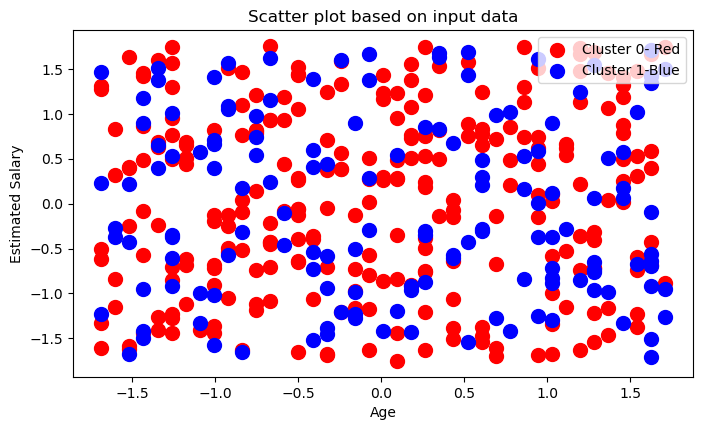

In [28]:


plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 0- Red')
plt.scatter (x[y == 1,0],x[y == 1,1] ,s = 100, c='b', label = 'Cluster 1-Blue')
plt.title ('Scatter plot based on input data')
plt.xlabel ('Age')
plt.ylabel ('Estimated Salary')
plt.legend(loc= 'upper right')
plt.show()



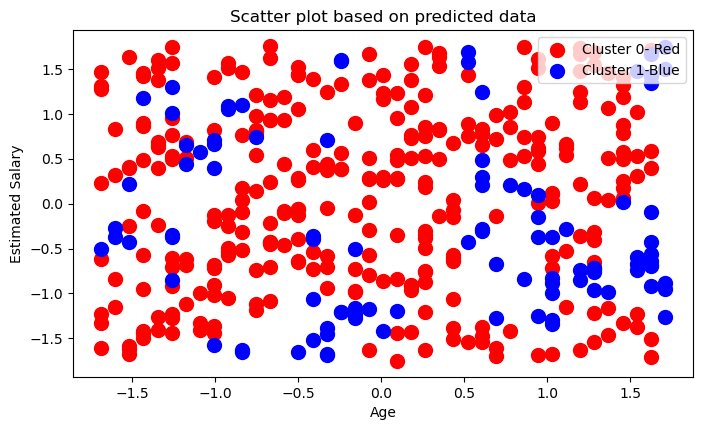

In [29]:

plt.scatter (x[y_pred == 0,0],x[y_pred == 0,1] ,s = 100, c='r', label = 'Cluster 0- Red')
plt.scatter (x[y_pred == 1,0],x[y_pred == 1,1] ,s = 100, c='b', label = 'Cluster 1-Blue')
plt.title ('Scatter plot based on predicted data')
plt.xlabel ('Age')
plt.ylabel ('Estimated Salary')
plt.legend(loc= 'upper right')
plt.show()


In [30]:

from sklearn.neighbors import KNeighborsClassifier
KNN1 = KNeighborsClassifier(n_neighbors =1 , metric = 'minkowski', p= 1)
KNN1.fit(x_train,y_train)
print (KNN1)


KNeighborsClassifier(n_neighbors=1, p=1)


In [31]:
y_pred = KNN1.predict(x_test)
print (y_pred)


[0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 1 1 1 1]


In [32]:
df_ypred = pd.DataFrame(y_pred,columns = ['Prediction'])
result = pd.concat ([pd.DataFrame (x_test, columns =['Age', 'Salary']) , 
                     pd.DataFrame (y_test,columns = ['Purchased']) ,df_ypred],axis = 1 )
print (result.head(50))



         Age    Salary  Purchased  Prediction
0   0.094637  0.486920          0           0
1   0.094637  0.951441          0           0
2  -0.414621 -1.063988          0           1
3  -0.754127  0.825325          0           0
4   0.688772 -0.676429          0           0
5   0.349266  0.826348          0           1
6   1.452659  1.407035          0           0
7  -1.178509  0.513703          0           0
8   0.858525  1.134935          0           0
9  -1.008756 -1.573854          1           1
10 -1.008756 -1.445337          0           0
11  1.113154  0.620730          0           0
12 -1.008756 -1.362236          0           1
13  0.264390 -1.206655          0           1
14  0.264390 -0.754484          0           0
15 -0.669250  0.928328          0           0
16 -0.159992 -0.975382          0           1
17 -0.075116  0.272056          0           1
18  0.094637  0.542462          1           0
19 -0.244868  1.597692          1           1
20  1.282906  1.549454          1 

In [33]:
from sklearn.metrics import accuracy_score
print (accuracy_score (y_test,y_pred))


0.6125


In [34]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=0))



              precision    recall  f1-score   support

           0       0.72      0.68      0.70        53
           1       0.43      0.48      0.46        27

    accuracy                           0.61        80
   macro avg       0.58      0.58      0.58        80
weighted avg       0.62      0.61      0.62        80



In [35]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y_test,y_pred)
print (cm)	


[[36 17]
 [14 13]]


In [36]:
y_pred = KNN1.predict(x)
print (y_pred)


[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0]


In [37]:
accuracy = accuracy_score (y,y_pred)
print (accuracy)


0.9225


In [38]:
cm = confusion_matrix (y,y_pred)
print (cm)	


[[240  17]
 [ 14 129]]


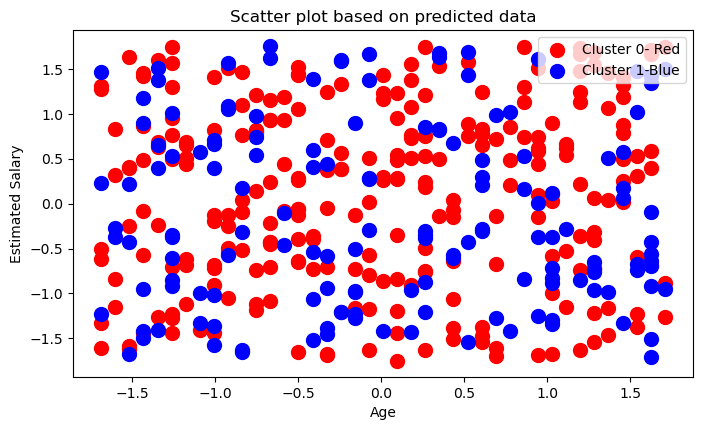

In [39]:
plt.scatter (x[y_pred  == 0,0],x[y_pred  == 0,1] ,s = 100, c='r', label = 'Cluster 0- Red')
plt.scatter (x[y_pred  == 1,0],x[y_pred  == 1,1] ,s = 100, c='b', label = 'Cluster 1-Blue')
plt.title ('Scatter plot based on predicted data')
plt.xlabel ('Age')
plt.ylabel ('Estimated Salary')
plt.legend(loc= 'upper right')
plt.show()


In [40]:

from sklearn.neighbors import KNeighborsClassifier
KNN5= KNeighborsClassifier(n_neighbors =5 , metric = 'minkowski', p= 1)
KNN5.fit(x_train,y_train)
y_pred5 = KNN5.predict(x)
print (y_pred5)


[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1
 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0
 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0]


In [41]:
accuracy = accuracy_score (y,y_pred5)
print (accuracy)


0.69
